<a href="https://colab.research.google.com/github/mshamesh/HumanActivityRecognition/blob/TrialBranch/Smartphones_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries/Dataset**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
# to import data set into colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Data Visualization and Exploration**

## 1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [23]:
#To read data from data set 

activity_data = pd.read_csv("/content/drive/MyDrive/Human_activity_Dataset (1).csv")
activity_data.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.80276,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.0,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.90016,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.0,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [24]:
# To identify all features in data set

activity_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject/Participant',
       'Activity'],
      dtype='object', length=563)

In [25]:
# Number of rows and columns

activity_data.shape

(10299, 563)

In [26]:
# To print data set info

activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


##2. Print the description and Basic statistical details.

In [27]:
activity_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,-0.305180,-0.562230,0.525304,0.389537,0.598022,-0.552087,-0.825460,-0.902704,-0.854662,-0.689162,-0.643512,-0.640686,-0.100332,-0.128765,-0.157863,-0.118954,0.108574,-0.035699,0.122000,-0.029677,0.031724,0.155148,-0.018077,0.006110,0.037729,0.034424,-0.082669,-0.120309,-0.197746,0.102199,...,-0.676629,-0.338469,-0.877800,0.173220,-0.298598,-0.601659,-0.697411,-0.699976,-0.681014,-0.734623,-0.888701,-0.697411,-0.881301,-0.722125,-0.076279,-0.886999,-0.041564,-0.264279,-0.575866,-0.779768,-0.792190,-0.773404,-0.809934,-0.871201,-0.779768,-0.937898,-0.772715,-0.274339,-0.900033,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,0.279920,0.282991,0.356589,0.338844,0.290615,0.461375,0.247052,0.125988,0.205998,0.359209,0.368865,0.372065,0.462315,

##3. Print each class label count (Activity) and create a pie chart for each class (% of data distribution). Write your observation on data balancing.

In [28]:
# To get each class label count

activity_data['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

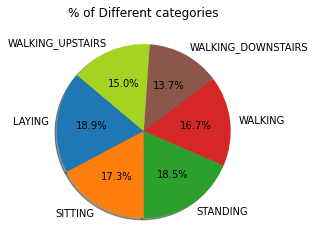

In [29]:
x = activity_data['Activity'].groupby(activity_data['Activity']).count().index
activities = activity_data['Activity'].groupby(activity_data['Activity']).count().values
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#a4d321"]
plt.pie(activities, labels=x,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

It can be observed that a higher percentage (almost 19%) of activity tracked was spent laying while a comparitively lower percentage (almost 14%) was spent walking downstairs. 
There is no any huge amount of gap between them. Therefore, we can say that data is balanced.

##4. Plot Activities by Subject/Participants and Provide appropriate comments on visualized data.

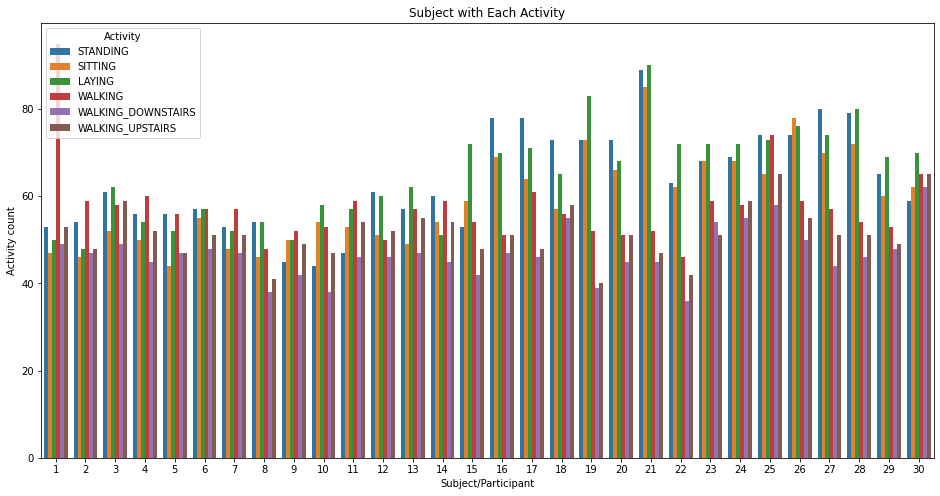

In [40]:
plt.figure(figsize = (16,8))
plt.title("Subject with Each Activity")
ax = sns.countplot(hue = 'Activity', x='subject/Participant',data = activity_data);
ax.set(xlabel='Subject/Participant', ylabel='Activity count')
plt.show()

As mentioned in legend, blue denotes standing, orange denotes sitting, green denotes laying, red denotes walking, purple denotes walking downstairs and brown denotes walking upstairs. The highest activity tracked was walking for subject 1 and the lowest activity tracked was that of walking downstairs for subject 22. Also as a general trend, it can be observed that there is a general increase in the activities from subject 15 onwards.

##5. Try exploring the data and see what insights can be drawn from the dataset.

**1. Static and Dynamic Activites**


Static activities are (sit, stand, lie and down) activities where there is no motion of any object.
Dynamic activities are (Walking, WalkingUpStairs, WalkingDownStairs) activities where motion info will be significant.

**2. Stationary and Moving activities are completely different**

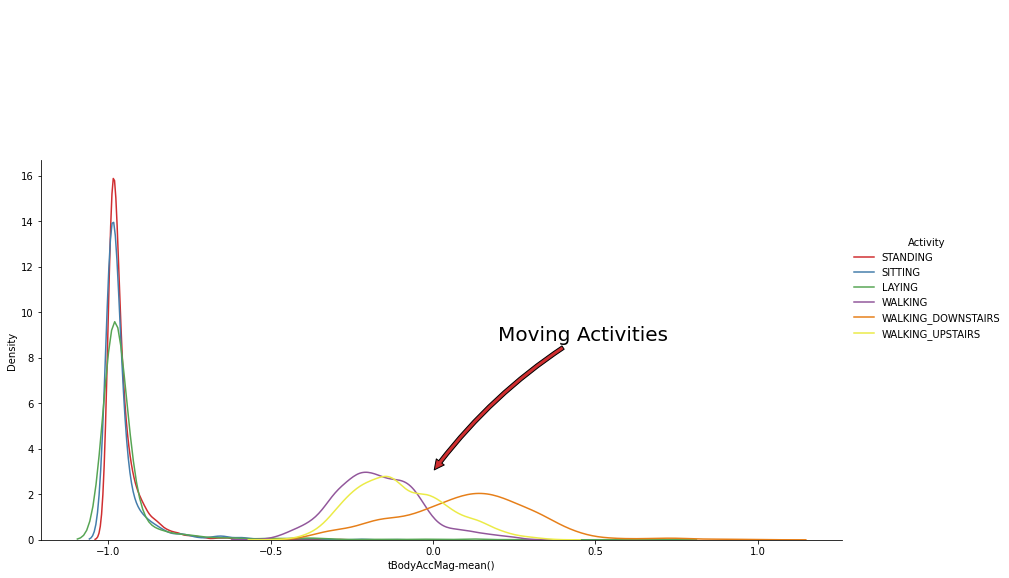

In [43]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(activity_data, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Taking a closer look..

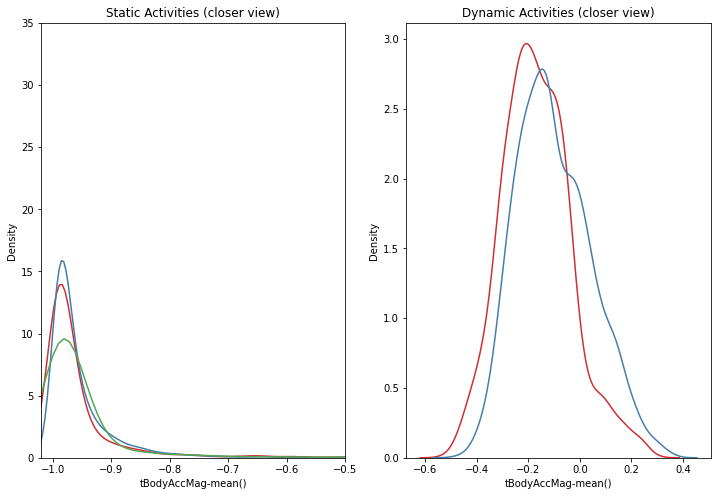

In [44]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Static Activities (closer view)")
sns.distplot(activity_data[activity_data["Activity"]=="SITTING"]['tBodyAccMag-mean()'], hist = False, label = 'Sitting');
sns.distplot(activity_data[activity_data["Activity"]=="STANDING"]['tBodyAccMag-mean()'], hist = False, label = 'Standing');
sns.distplot(activity_data[activity_data["Activity"]=="LAYING"]['tBodyAccMag-mean()'], hist = False, label = 'Laying');
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities (closer view)")
sns.distplot(activity_data[activity_data["Activity"]=="WALKING"]["tBodyAccMag-mean()"], hist = False, label ="Sitting");
sns.distplot(activity_data[activity_data["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'], hist = False, label = 'Laying');

Using a box plot to visualise..

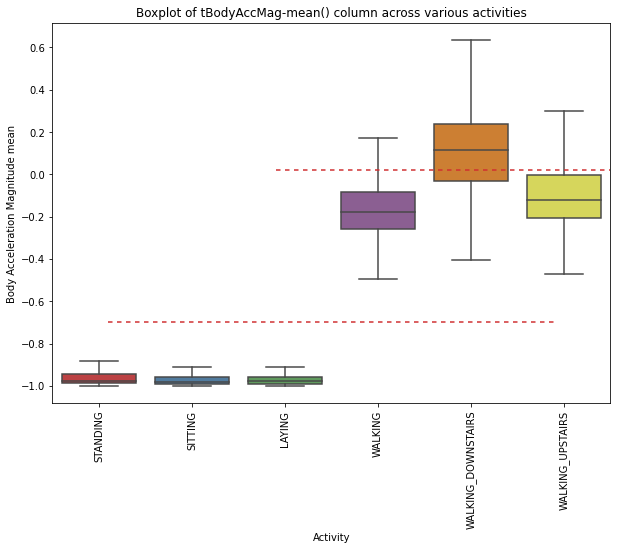

In [45]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y ='tBodyAccMag-mean()', data = activity_data, showfliers = False);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMag-mean() column across various activities')
plt.axhline(y =- 0.7, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.axhline(y = 0.020, xmin = 0.4, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

Using boxplot, we can come up with conditions to seperate static activities from dynamic activities.

if(tBodyAccMagmean <= -0.8):
      Activity = "static"
  if(tBodyAccMagmean >= -0.6):
      Activity = "dynamic"

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

if (tBodyAccMagmean > 0.02):
    Activity = "WALKING_DOWNSTARIS"
else:
    Activity = "others"

But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as others so this condition makes an error of 25% in classification.